In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('../../datasets/Iowa_Liquor_Sales.csv')
df

<ipython-input-18-0bf783e9d5d8>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../datasets/Iowa_Liquor_Sales.csv')


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-09962700007,01/23/2018,4310.0,Fareway Stores #502 / Cherokee,205 West Bluff St,Cherokee,51012.0,POINT (-95.551866 42.75508),18.0,CHEROKEE,...,14192.0,Pendleton Canadian Whisky,12.0,750.0,13.10,19.65,3.0,58.95,2.25,0.59
1,INV-09965700080,01/23/2018,2572.0,Hy-Vee Food Store / Cedar Falls,6301 University,Cedar Falls,50613.0,POINT (-92.435236 42.512789),7.0,BLACK HAWK,...,35318.0,Barton Vodka,6.0,1750.0,6.92,10.38,12.0,124.56,21.00,5.55
2,INV-10018300132,01/25/2018,2544.0,Hy-Vee Food Store / Marshalltown,802 South Center,Marshalltown,50158.0,POINT (-92.912817 42.039205),64.0,MARSHALL,...,45247.0,Paramount Gold Rum,12.0,1000.0,4.42,6.63,12.0,79.56,12.00,3.17
3,INV-10004400033,01/25/2018,2130.0,Sycamore Convenience,617 Sycamore,Waterloo,50703.0,POINT (-92.335358 42.497854),7.0,BLACK HAWK,...,42717.0,Malibu Coconut Rum,12.0,1000.0,10.49,15.74,36.0,566.64,36.00,9.51
4,INV-09923000033,01/22/2018,5373.0,Sodes Green Acre,7 Goethe Street Ste. B,Guttenberg,52052.0,POINT (-91.095813 42.782907),22.0,CLAYTON,...,66213.0,Piehole Pecan Pie,12.0,750.0,7.49,11.24,2.0,22.48,1.50,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21499067,INV-00862400025,10/10/2016,2650.0,Hy-Vee Wine and Spirits / Harlan,1808 23rd St,Harlan,51537,POINT (-95.339881 4{,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21499068,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21499069,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21499070,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.drop(['County Number', 'Category'], axis=1, inplace=True)
#dropping store location because have county and address
#dropping county number since we're joining on county name anyways
#dropping category because it is redudant, we just need category name
df["Year"] = df.apply (lambda row: int(row['Date'][-4:]), axis=1)
df = df.astype({'Year': 'int64'})
df.dropna(subset=['Pack', 'Bottles Sold'], inplace=True)
df

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County,Category Name,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-09962700007,01/23/2018,4310.0,Fareway Stores #502 / Cherokee,205 West Bluff St,Cherokee,51012.0,POINT (-95.551866 42.75508),CHEROKEE,Canadian Whiskies,...,14192.0,Pendleton Canadian Whisky,12.0,750.0,13.10,19.65,3.0,58.95,2.25,0.59
1,INV-09965700080,01/23/2018,2572.0,Hy-Vee Food Store / Cedar Falls,6301 University,Cedar Falls,50613.0,POINT (-92.435236 42.512789),BLACK HAWK,American Vodkas,...,35318.0,Barton Vodka,6.0,1750.0,6.92,10.38,12.0,124.56,21.00,5.55
2,INV-10018300132,01/25/2018,2544.0,Hy-Vee Food Store / Marshalltown,802 South Center,Marshalltown,50158.0,POINT (-92.912817 42.039205),MARSHALL,Gold Rum,...,45247.0,Paramount Gold Rum,12.0,1000.0,4.42,6.63,12.0,79.56,12.00,3.17
3,INV-10004400033,01/25/2018,2130.0,Sycamore Convenience,617 Sycamore,Waterloo,50703.0,POINT (-92.335358 42.497854),BLACK HAWK,Flavored Rum,...,42717.0,Malibu Coconut Rum,12.0,1000.0,10.49,15.74,36.0,566.64,36.00,9.51
4,INV-09923000033,01/22/2018,5373.0,Sodes Green Acre,7 Goethe Street Ste. B,Guttenberg,52052.0,POINT (-91.095813 42.782907),CLAYTON,Whiskey Liqueur,...,66213.0,Piehole Pecan Pie,12.0,750.0,7.49,11.24,2.0,22.48,1.50,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21499062,INV-00853900047,10/10/2016,2661.0,Hy-Vee Food Store / Sheldon,1989 Park St,Sheldon,51201,POINT (-95.831721 43.186038),OBRIEN,Tennessee Whiskies,...,26906.0,Jack Daniels Single Barrel,6.0,750.0,27.59,41.39,6.0,243.84,4.50,1.19
21499063,INV-00837100016,10/10/2016,4296.0,Circle B Market,111 Main St,Keosauqua,52565,POINT (-91.962466 40.7294),VAN BUREN,Canadian Whiskies,...,11774.0,Black Velvet,24.0,375.0,3.07,4.61,1.0,4.61,0.38,0.10
21499064,INV-00906500005,10/12/2016,3735.0,C B Liquor,1202 A Ave East,Oskaloosa,52577,POINT (-92.631487 41.296286),Buchanan,American Cordials & Liqueur,...,76488.0,Paramount Amaretto,6.0,1750.0,8.07,12.11,6.0,72.66,10.50,2.77
21499065,INV-00858800008,10/10/2016,2613.0,Hy-Vee Food Store #1 / Council Bluffs,2323 W Broadway,Council Bluffs,51501,POINT (-95.879662 41.261925),POTTAWATTA,Imported Vodkas,...,34007.0,Absolut Swedish Vodka 80 Prf,12.0,1000.0,14.99,22.49,12.0,269.88,12.00,3.17


In [4]:
df[df.columns].isna().sum()

Invoice/Item Number            0
Date                           0
Store Number                   0
Store Name                     0
Address                    27991
City                       27990
Zip Code                   28035
Store Location           2088510
County                    104793
Category Name              17765
Vendor Number                  7
Vendor Name                    7
Item Number                    0
Item Description               0
Pack                           0
Bottle Volume (ml)             0
State Bottle Cost             10
State Bottle Retail           10
Bottles Sold                   0
Sale (Dollars)                10
Volume Sold (Liters)           0
Volume Sold (Gallons)          0
dtype: int64

In [24]:
null_counties = df[df['County'].isnull()]
null_counties[['Store Name']]

,Store Name
103,Casey's General Store #1365 / Paullina
819,Mart Stop #1 / Davenport
2209,Foodland Super Markets / Woodbine
2770,Sam's Club 6344 / Windsor Heights
2914,Mart Stop #1 / Davenport
...,...
21498906,Casey's General Store #1503 / Tabor
21499001,Smokin' Joe's #15 Tobacco & Liquor O
21499035,Hy-Vee Wine and Spirits / Estherville
21499038,Hy-Vee Food Store #1 / Ottumwa


In [29]:
def substring_after(s, delim):
    return s['Store Name'].partition(delim)[2]

null_counties['City'] = null_counties.apply(lambda row: substring_after(row, "/ "), axis=1)

null_counties = null_counties[null_counties['City'] != ""]
null_counties

<ipython-input-29-4337d2138512>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_counties['City'] = null_counties.apply(lambda row: substring_after(row, "/ "), axis=1)


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County,Category Name,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
103,INV-09971500002,01/23/2018,4777.0,Casey's General Store #1365 / Paullina,NaN,Paullina,NaN,NaN,NaN,Canadian Whiskies,...,11776.0,Black Velvet,12.0,750.0,5.23,7.85,12.0,94.20,9.00,2.38
819,INV-09991100009,01/24/2018,4640.0,Mart Stop #1 / Davenport,NaN,Davenport,NaN,NaN,NaN,Imported Vodkas,...,34423.0,Grey Goose Vodka,12.0,375.0,9.00,13.50,12.0,162.00,4.50,1.19
2209,INV-10073900023,01/29/2018,4000.0,Foodland Super Markets / Woodbine,NaN,Woodbine,NaN,NaN,NaN,Blended Whiskies,...,25606.0,Seagrams 7 Crown Bl Whiskey,12.0,750.0,7.00,10.50,2.0,21.00,1.50,0.40
2770,INV-10143000039,02/01/2018,3420.0,Sam's Club 6344 / Windsor Heights,NaN,Windsor Heights,NaN,NaN,NaN,Imported Flavored Vodka,...,34117.0,Absolut Mandrin,12.0,1000.0,14.99,22.49,12.0,269.88,12.00,3.17
2914,INV-09991100010,01/24/2018,4640.0,Mart Stop #1 / Davenport,NaN,Davenport,NaN,NaN,NaN,Spiced Rum,...,43331.0,Captain Morgan Spiced Rum Mini,12.0,500.0,4.80,7.20,12.0,86.40,6.00,1.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498886,INV-00901000049,10/12/2016,4319.0,Fareway Stores #703 / Humbolt,NaN,Humbolt,NaN,NaN,NaN,American Schnapps,...,82866.0,Dekuyper Watermelon Pucker,12.0,750.0,6.47,9.71,3.0,28.35,2.25,0.59
21498906,INV-00955500004,10/14/2016,5223.0,Casey's General Store #1503 / Tabor,NaN,Tabor,NaN,NaN,NaN,Straight Bourbon Whiskies,...,19064.0,Jim Beam,24.0,375.0,5.50,8.25,24.0,189.12,9.00,2.38
21499035,INV-00896500064,10/12/2016,2556.0,Hy-Vee Wine and Spirits / Estherville,NaN,Estherville,NaN,NaN,NaN,Whiskey Liqueur,...,64858.0,Fireball Cinnamon Whiskey Mini Dispenser,1.0,3000.0,30.00,45.00,2.0,89.16,6.00,1.59
21499038,INV-00907000045,10/12/2016,2543.0,Hy-Vee Food Store #1 / Ottumwa,NaN,Ottumwa,NaN,NaN,NaN,Straight Bourbon Whiskies,...,27544.0,Red Stag Black Cherry,12.0,750.0,10.49,15.74,4.0,62.96,3.00,0.79


In [30]:
null_counties.drop('County', axis=1, inplace= True)

<ipython-input-30-8f46003041ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_counties.drop('County', axis=1, inplace= True)


In [31]:
lookup = pd.read_csv('city_county_lookup.csv')
lookup['County'] = lookup['County'].astype(str).str.upper()
lookup['City'] = lookup['City'].astype(str).str.upper()
null_counties['City'] = null_counties['City'].astype(str).str.upper()
null_counties = pd.merge(null_counties, lookup,  how='left', left_on=['City'], right_on = ['City'])

<ipython-input-31-aef903c1a5b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_counties['City'] = null_counties['City'].astype(str).str.upper()


In [32]:
null_counties

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,Category Name,Vendor Number,...,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),County
0,INV-09971500002,01/23/2018,4777.0,Casey's General Store #1365 / Paullina,NaN,PAULLINA,NaN,NaN,Canadian Whiskies,115.0,...,Black Velvet,12.0,750.0,5.23,7.85,12.0,94.20,9.00,2.38,O'BRIEN
1,INV-09991100009,01/24/2018,4640.0,Mart Stop #1 / Davenport,NaN,DAVENPORT,NaN,NaN,Imported Vodkas,35.0,...,Grey Goose Vodka,12.0,375.0,9.00,13.50,12.0,162.00,4.50,1.19,SCOTT
2,INV-10073900023,01/29/2018,4000.0,Foodland Super Markets / Woodbine,NaN,WOODBINE,NaN,NaN,Blended Whiskies,260.0,...,Seagrams 7 Crown Bl Whiskey,12.0,750.0,7.00,10.50,2.0,21.00,1.50,0.40,HARRISON
3,INV-10143000039,02/01/2018,3420.0,Sam's Club 6344 / Windsor Heights,NaN,WINDSOR HEIGHTS,NaN,NaN,Imported Flavored Vodka,370.0,...,Absolut Mandrin,12.0,1000.0,14.99,22.49,12.0,269.88,12.00,3.17,POLK
4,INV-09991100010,01/24/2018,4640.0,Mart Stop #1 / Davenport,NaN,DAVENPORT,NaN,NaN,Spiced Rum,260.0,...,Captain Morgan Spiced Rum Mini,12.0,500.0,4.80,7.20,12.0,86.40,6.00,1.59,SCOTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,INV-00901000049,10/12/2016,4319.0,Fareway Stores #703 / Humbolt,NaN,HUMBOLT,NaN,NaN,American Schnapps,65.0,...,Dekuyper Watermelon Pucker,12.0,750.0,6.47,9.71,3.0,28.35,2.25,0.59,HUMBOLDT
52412,INV-00955500004,10/14/2016,5223.0,Casey's General Store #1503 / Tabor,NaN,TABOR,NaN,NaN,Straight Bourbon Whiskies,65.0,...,Jim Beam,24.0,375.0,5.50,8.25,24.0,189.12,9.00,2.38,FREMONT
52413,INV-00896500064,10/12/2016,2556.0,Hy-Vee Wine and Spirits / Estherville,NaN,ESTHERVILLE,NaN,NaN,Whiskey Liqueur,421.0,...,Fireball Cinnamon Whiskey Mini Dispenser,1.0,3000.0,30.00,45.00,2.0,89.16,6.00,1.59,EMMET
52414,INV-00907000045,10/12/2016,2543.0,Hy-Vee Food Store #1 / Ottumwa,NaN,OTTUMWA,NaN,NaN,Straight Bourbon Whiskies,65.0,...,Red Stag Black Cherry,12.0,750.0,10.49,15.74,4.0,62.96,3.00,0.79,WAPELLO


In [33]:
 df = df.append(null_counties)

<ipython-input-33-41eccdd61de7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(null_counties)


In [34]:
df

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County,Category Name,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-09962700007,01/23/2018,4310.0,Fareway Stores #502 / Cherokee,205 West Bluff St,Cherokee,51012.0,POINT (-95.551866 42.75508),CHEROKEE,Canadian Whiskies,...,14192.0,Pendleton Canadian Whisky,12.0,750.0,13.10,19.65,3.0,58.95,2.25,0.59
1,INV-09965700080,01/23/2018,2572.0,Hy-Vee Food Store / Cedar Falls,6301 University,Cedar Falls,50613.0,POINT (-92.435236 42.512789),BLACK HAWK,American Vodkas,...,35318.0,Barton Vodka,6.0,1750.0,6.92,10.38,12.0,124.56,21.00,5.55
2,INV-10018300132,01/25/2018,2544.0,Hy-Vee Food Store / Marshalltown,802 South Center,Marshalltown,50158.0,POINT (-92.912817 42.039205),MARSHALL,Gold Rum,...,45247.0,Paramount Gold Rum,12.0,1000.0,4.42,6.63,12.0,79.56,12.00,3.17
3,INV-10004400033,01/25/2018,2130.0,Sycamore Convenience,617 Sycamore,Waterloo,50703.0,POINT (-92.335358 42.497854),BLACK HAWK,Flavored Rum,...,42717.0,Malibu Coconut Rum,12.0,1000.0,10.49,15.74,36.0,566.64,36.00,9.51
4,INV-09923000033,01/22/2018,5373.0,Sodes Green Acre,7 Goethe Street Ste. B,Guttenberg,52052.0,POINT (-91.095813 42.782907),CLAYTON,Whiskey Liqueur,...,66213.0,Piehole Pecan Pie,12.0,750.0,7.49,11.24,2.0,22.48,1.50,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,INV-00901000049,10/12/2016,4319.0,Fareway Stores #703 / Humbolt,NaN,HUMBOLT,NaN,NaN,HUMBOLDT,American Schnapps,...,82866.0,Dekuyper Watermelon Pucker,12.0,750.0,6.47,9.71,3.0,28.35,2.25,0.59
52412,INV-00955500004,10/14/2016,5223.0,Casey's General Store #1503 / Tabor,NaN,TABOR,NaN,NaN,FREMONT,Straight Bourbon Whiskies,...,19064.0,Jim Beam,24.0,375.0,5.50,8.25,24.0,189.12,9.00,2.38
52413,INV-00896500064,10/12/2016,2556.0,Hy-Vee Wine and Spirits / Estherville,NaN,ESTHERVILLE,NaN,NaN,EMMET,Whiskey Liqueur,...,64858.0,Fireball Cinnamon Whiskey Mini Dispenser,1.0,3000.0,30.00,45.00,2.0,89.16,6.00,1.59
52414,INV-00907000045,10/12/2016,2543.0,Hy-Vee Food Store #1 / Ottumwa,NaN,OTTUMWA,NaN,NaN,WAPELLO,Straight Bourbon Whiskies,...,27544.0,Red Stag Black Cherry,12.0,750.0,10.49,15.74,4.0,62.96,3.00,0.79


In [6]:
df['Category Name'].mask(df['Category Name'] == 'American Cordials & Liqueurs',  "American Cordials & Liqueur", inplace=True)
df['Category Name'].mask(df['Category Name'] == 'American Distilled Spirits Specialty',  "American Distilled Spirit Specialty", inplace=True)
df['Category Name'].mask(df['Category Name'] == 'American Vodka',  "American Vodkas", inplace=True)
df['Category Name'].mask(df['Category Name'] == 'Cocktails / RTD',  "Cocktails/RTD", inplace=True)
df['Category Name'].mask(df['Category Name'] == "Cocktails /RTD",  "Cocktails/RTD", inplace=True)
df['Category Name'].mask(df['Category Name'] == "Imported Cordials & Liqueur",  "Imported Cordials & Liqueurs", inplace=True)
df['Category Name'].mask(df['Category Name'] == "Imported Distilled Spirits Specialty",  "Imported Distilled Spirit Specialty", inplace=True)
df['Category Name'].mask(df['Category Name'] == "Temporary  & Specialty Packages",  "Temporary & Specialty Packages", inplace=True)
df['Category Name'].mask(df['Category Name'] == "Temporary &  Specialty Packages",  "Temporary & Specialty Packages", inplace=True)

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df['Category Name'].value_counts().sort_index())

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:9286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(


100% Agave Tequila                      363850
Aged Dark Rum                            34904
American Brandies                       335850
American Cordials & Liqueur             277075
American Distilled Spirit Specialty      29760
American Dry Gins                       210280
American Flavored Vodka                 559640
American Schnapps                       371343
American Sloe Gins                        3646
American Vodkas                        1746843
American Whiskies                            1
Blended Whiskies                        490358
Bottled in Bond Bourbon                  15741
Canadian Whiskies                      1108145
Cocktails/RTD                           351003
Coffee Liqueurs                          64240
Corn Whiskies                             7636
Cream Liqueurs                          233337
Delisted / Special Order Items               1
Delisted Items                              63
Distilled Spirits Specialty                321
Flavored Gin 

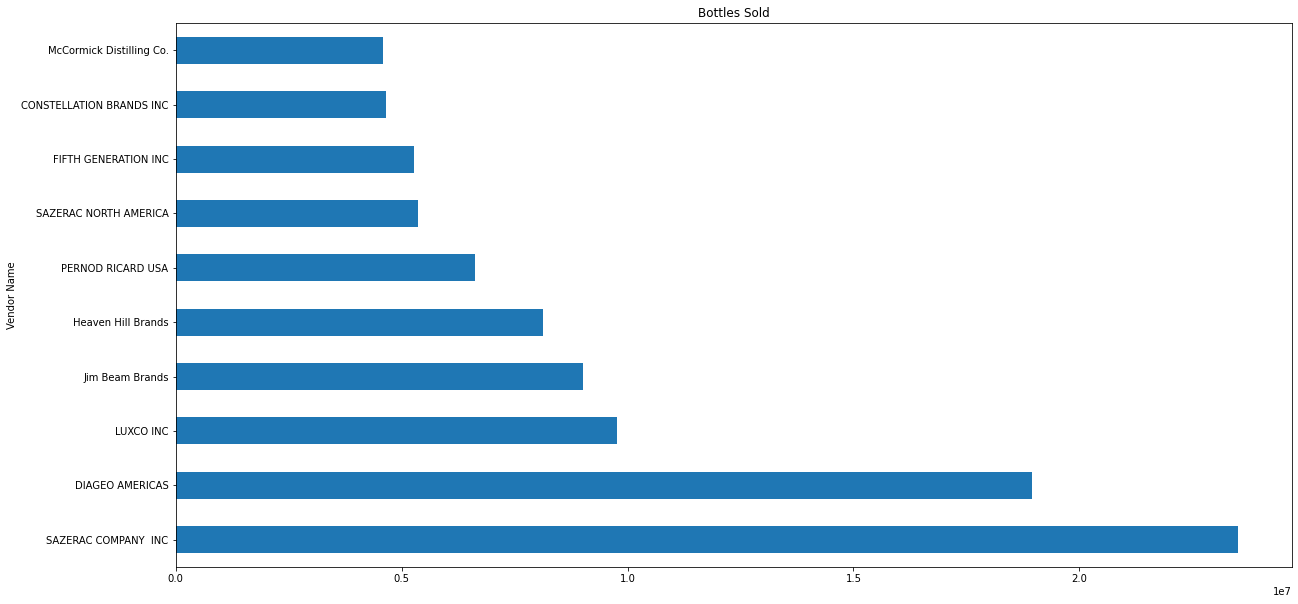

In [13]:
df.groupby('Vendor Name')['Bottles Sold'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Bottles Sold')
plt.show()

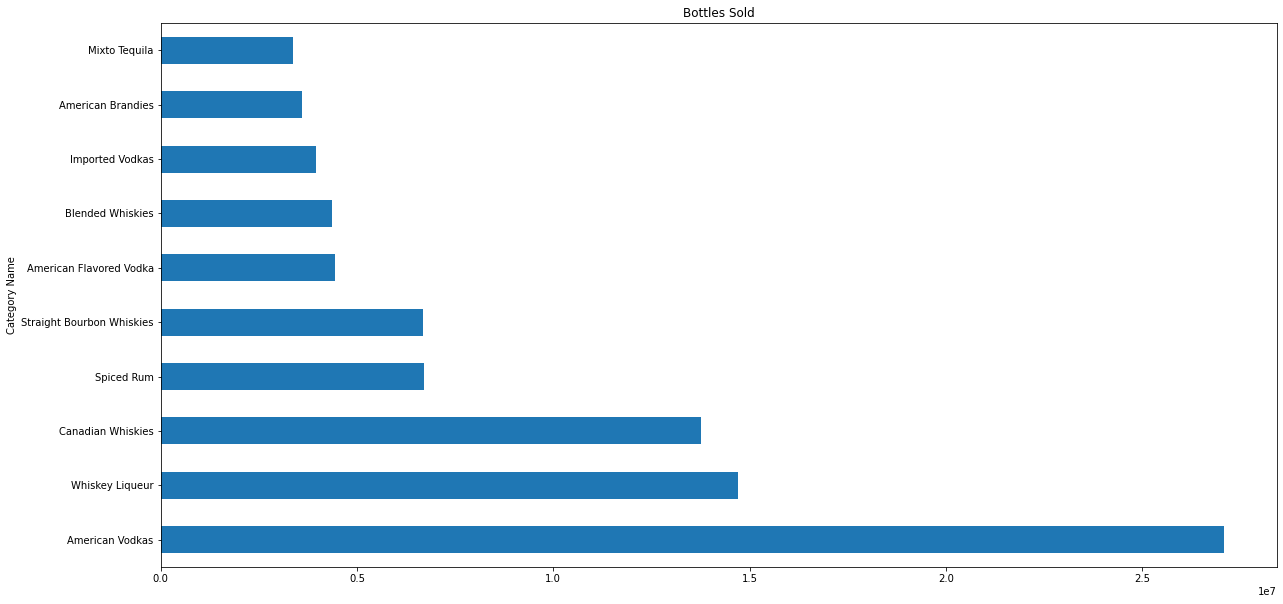

In [14]:
df.groupby('Category Name')['Bottles Sold'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Bottles Sold')
plt.show()

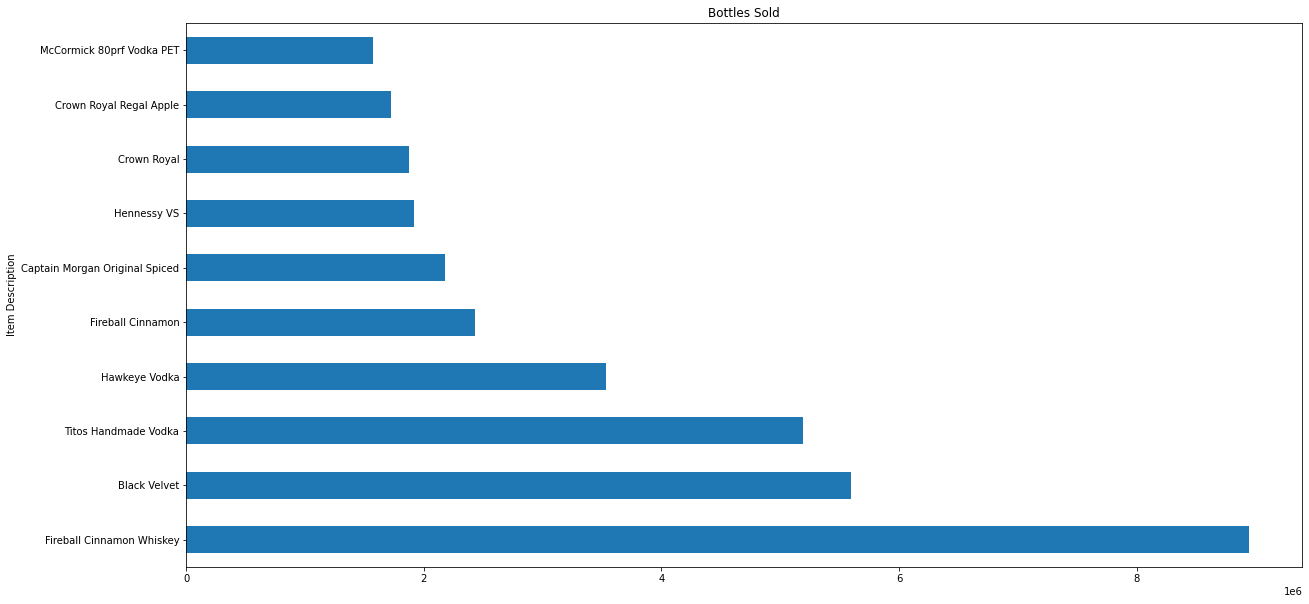

In [15]:
df.groupby('Item Description')['Bottles Sold'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Bottles Sold')
plt.show()

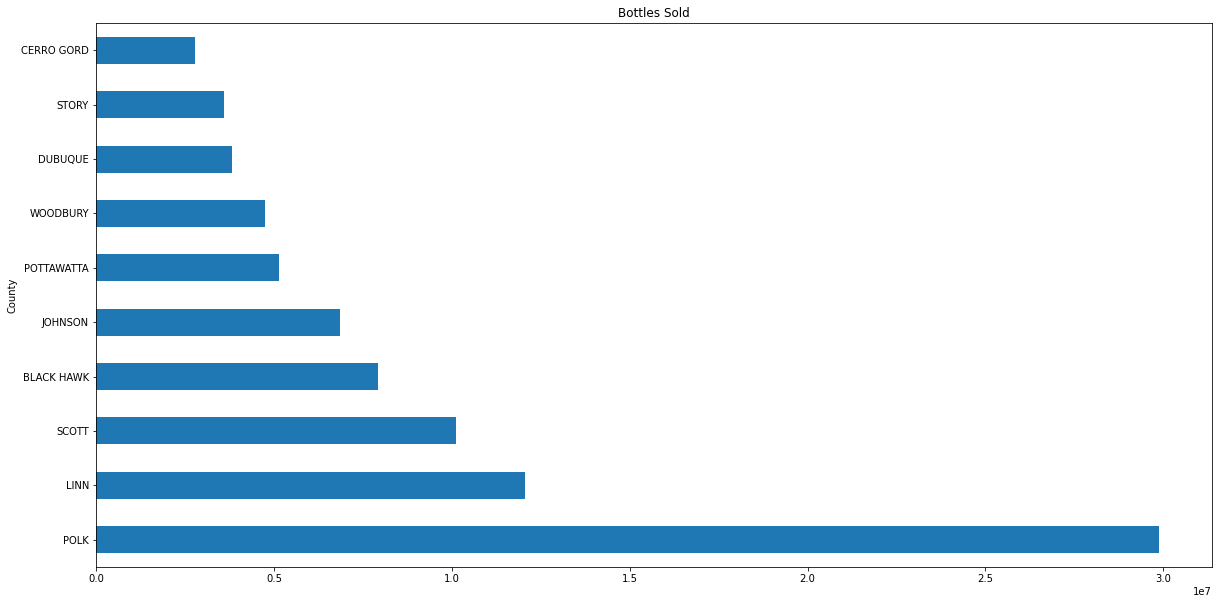

In [16]:
df.groupby('County')['Bottles Sold'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Bottles Sold')
plt.show()

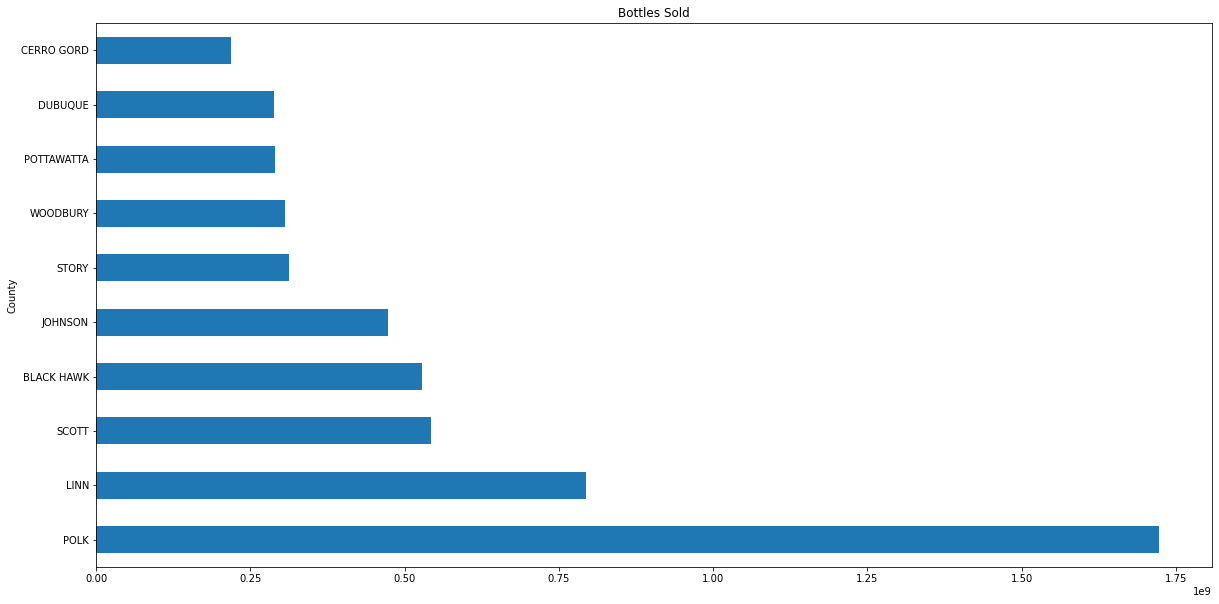

In [17]:
df.groupby('County')['Bottle Volume (ml)'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Bottles Sold')
plt.show()

### Merging...  D:

In [9]:
ests = pd.read_csv("EstimatesFinal.csv")
ests['County'] = ests['County'].astype(str).str.upper()
ests

new_df = pd.merge(df, ests,  how='left', left_on=['County','Year'], right_on = ['County','Year'])
new_df

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County,Category Name,...,Asian ME,Pacific Estimate,Pacific ME,Other Estimate,Other ME,Two+ Estimate,Two+ ME,HighIncome,LowIncome,MidIncome
0,INV-09962700007,01/23/2018,4310.0,Fareway Stores #502 / Cherokee,205 West Bluff St,Cherokee,51012.0,POINT (-95.551866 42.75508),CHEROKEE,Canadian Whiskies,...,74.0,0.0,16.0,8,10,325,130,611.0,629.0,1885.0
1,INV-09965700080,01/23/2018,2572.0,Hy-Vee Food Store / Cedar Falls,6301 University,Cedar Falls,50613.0,POINT (-92.435236 42.512789),BLACK HAWK,American Vodkas,...,154.0,367.0,200.0,"1,412",397,"3,801",649,6573.0,7735.0,17021.0
2,INV-10018300132,01/25/2018,2544.0,Hy-Vee Food Store / Marshalltown,802 South Center,Marshalltown,50158.0,POINT (-92.912817 42.039205),MARSHALL,Gold Rum,...,88.0,15.0,21.0,"2,437",725,"1,689",529,1648.0,2136.0,6229.0
3,INV-10004400033,01/25/2018,2130.0,Sycamore Convenience,617 Sycamore,Waterloo,50703.0,POINT (-92.335358 42.497854),BLACK HAWK,Flavored Rum,...,154.0,367.0,200.0,"1,412",397,"3,801",649,6573.0,7735.0,17021.0
4,INV-09923000033,01/22/2018,5373.0,Sodes Green Acre,7 Goethe Street Ste. B,Guttenberg,52052.0,POINT (-91.095813 42.782907),CLAYTON,Whiskey Liqueur,...,16.0,0.0,16.0,61,45,165,80,730.0,981.0,3009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617164,INV-00837100016,10/10/2016,4296.0,Circle B Market,111 Main St,Keosauqua,52565,POINT (-91.962466 40.7294),VAN BUREN,Canadian Whiskies,...,24.0,0.0,14.0,25,30,110,26,249.0,500.0,1180.0
11617165,INV-00906500005,10/12/2016,3735.0,C B Liquor,1202 A Ave East,Oskaloosa,52577,POINT (-92.631487 41.296286),BUCHANAN,American Cordials & Liqueur,...,96.0,2.0,4.0,3,5,456,126,1178.0,1075.0,3375.0
11617166,INV-00858800008,10/10/2016,2613.0,Hy-Vee Food Store #1 / Council Bluffs,2323 W Broadway,Council Bluffs,51501,POINT (-95.879662 41.261925),POTTAWATTA,Imported Vodkas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11617167,INV-00876200011,10/11/2016,5124.0,Price Chopper / Johnston,5440 NW 86th St,Johnston,50131,POINT (-93.738772 41.65919800000001),POLK,Straight Bourbon Whiskies,...,598.0,417.0,88.0,"8,538","1,089","17,358","1,412",33902.0,20847.0,62371.0


In [12]:
df['Year'].value_counts()

2021    2622712
2020    2614365
2019    2380345
2018    2203872
2022    1654629
2016     105288
2017      35958
Name: Year, dtype: int64